In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../../../output/current_values.csv", index_col=0)


hf = pd.read_csv("../../../output/Codes/2digit_occupations.csv", index_col=0)
hf = hf.set_index("codes")



/Users/jsusser/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


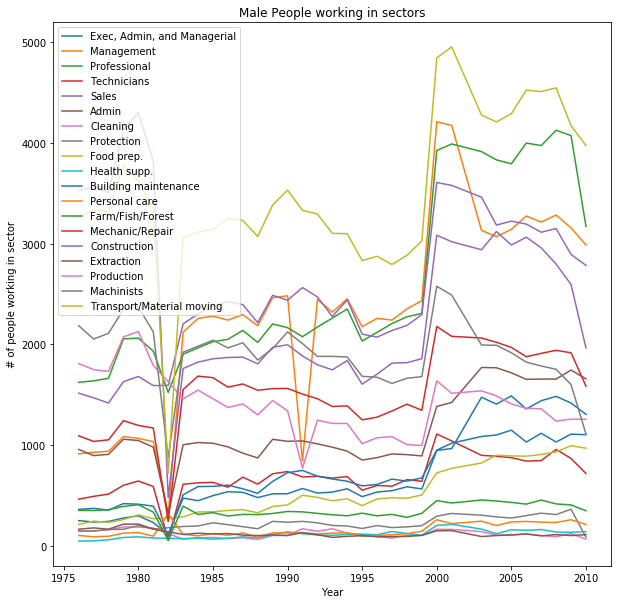

In [2]:
#Year and number of people employed in certain field
df = df[df["Male"]==1]
years = []
employments = []
digit = 1
grouped = df.groupby(['2digit occupation', 'Year']).count()["3digit occupation"].reset_index()
grouped.columns = ["2digit occupation", "Year", "employment"]
plt.figure(figsize=(10,10))
for x in range(len(grouped)):
    two = grouped.iloc[x][0]
    year = grouped.iloc[x][1]
    employment = grouped.iloc[x][2]
    if digit != two:
        plt.plot(years, employments, label=hf.loc[digit]["occupation"])
        digit = two
        years = []
        employments = []
    years.append(year)
    employments.append(employment)
plt.plot(years, employments, label=hf.loc[digit]["occupation"])
plt.xlabel("Year")
plt.ylabel("# of people working in sector")
plt.title("Male People working in sectors")
plt.legend()
plt.savefig('../../../output/Graphs/Male/Male num of people employed by sectors.png')

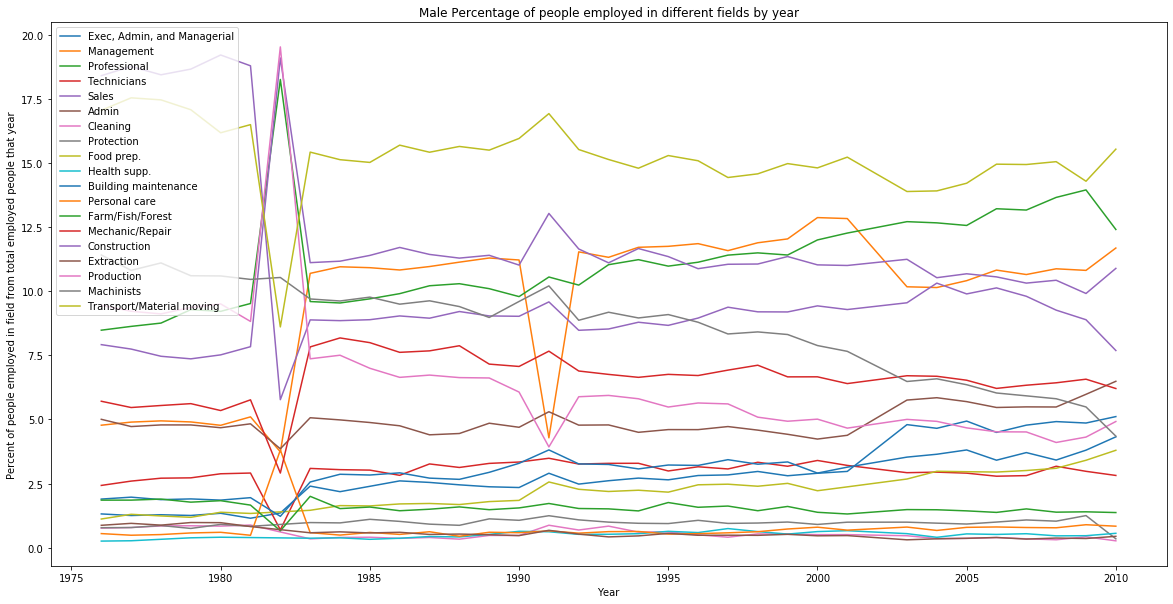

In [3]:
#Year and percent of people employed in certain field out of all of the people working that year
df = df[df["Male"]==1]
grouped = df.groupby(['2digit occupation', 'Year']).count()["3digit occupation"].reset_index()
grouped.columns = ["2digit occupation", "Year", "employment"]
years_grouped = df.groupby('Year').count()["3digit occupation"].reset_index()
years_grouped = years_grouped.rename(columns={"3digit occupation": "employed_num"})
grouped = pd.merge(grouped, years_grouped, on='Year', how='left')
grouped["employment_percent"] = grouped["employment"] / grouped["employed_num"] * 100
grouped = grouped.drop(columns = ["employment", "employed_num"])
years = []
employments = []
digit = 1
plt.figure(figsize=(20,10))
for x in range(len(grouped)):
    two = grouped.iloc[x][0]
    year = grouped.iloc[x][1]
    employment_percent = grouped.iloc[x][2]
    if digit != two:
        plt.plot(years, employments, label=hf.loc[digit]["occupation"])
        digit = two
        years = []
        employments = []
    years.append(year)
    employments.append(employment_percent)
plt.plot(years, employments, label=hf.loc[digit]["occupation"])
plt.xlabel("Year")
plt.ylabel("Percent of people employed in field from total employed people that year")
plt.title("Male Percentage of people employed in different fields by year")
plt.legend(loc=2)
plt.savefig('../../../output/Graphs/Male/Male percent of people employed by sectors.png')